# Social Network - PyTorch


In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
# Featch dataset
url = "https://raw.githubusercontent.com/git-to-aswin/ML-Model-Building/refs/heads/main/dataset/Social_Network_Ads.csv"
df = pd.read_csv(url)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
# Feature Selection
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

X = df[['Age', 'EstimatedSalary', 'Gender']].values.astype(float)
y = df['Purchased'].values.reshape(-1, 1).astype(float)


In [6]:
# Train Test Split
np.random.seed(42)

indices = np.random.permutation(len(X))
split = int(0.8 * len(X))

train_idx = indices[:split]
test_idx  = indices[split:]

X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

In [8]:
# Feature scaling

X_mean = X_train.mean(axis=0)
X_std  = X_train.std(axis=0)

X_train = (X_train - X_mean) / X_std
X_test  = (X_test  - X_mean) / X_std

In [9]:
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)

X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32)

# Model Building

In [19]:
class LogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
      # forward() = mathematical equation of the model -> z = XW + b
        return self.linear(x)  # logits

In [14]:
model = LogisticRegression(input_dim=3)

# Loss Function + Optimiser

In [15]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for `loss.backward()`:
	•	Traverses the computation graph backwards
	•	Applies the chain rule
	•	Computes:
	•	∂loss / ∂W
	•	∂loss / ∂b

In [16]:
epochs = 2000
losses = []

for epoch in range(epochs):
    logits = model(X_train_t)
    loss = criterion(logits, y_train_t)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    losses.append(loss.item())

    if epoch % 200 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Epoch 0, Loss: 0.6972
Epoch 200, Loss: 0.3599
Epoch 400, Loss: 0.3354
Epoch 600, Loss: 0.3307
Epoch 800, Loss: 0.3297
Epoch 1000, Loss: 0.3295
Epoch 1200, Loss: 0.3295
Epoch 1400, Loss: 0.3294
Epoch 1600, Loss: 0.3294
Epoch 1800, Loss: 0.3294


| Step | Meaning |
|---|-------|
forward() | Compute predictions |
| loss() | Measure error |
|backward() |Compute gradients|
|step() | Update parameters|
|zero_grad()| Clear old gradients|

# Plot Learning curve

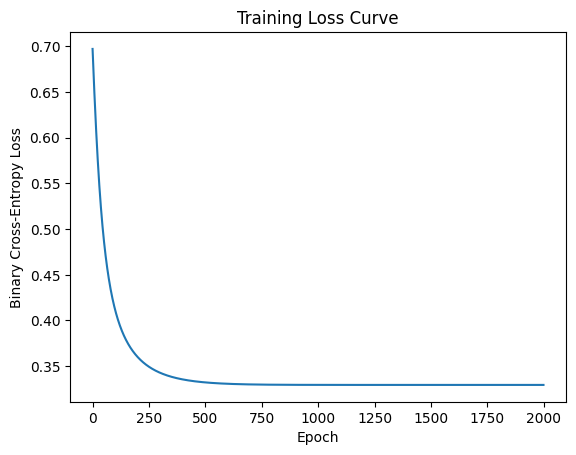

In [17]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Binary Cross-Entropy Loss")
plt.title("Training Loss Curve")
plt.show()

# Make Prediction

In [18]:
with torch.no_grad():
    logits_test = model(X_test_t)
    probs = torch.sigmoid(logits_test)
    y_pred = (probs >= 0.5).float()

In [20]:
# Evaluate
accuracy = (y_pred == y_test_t).float().mean()
print("Accuracy:", accuracy.item())

Accuracy: 0.8500000238418579


In [21]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred.numpy())
print(cm)

[[49  6]
 [ 6 19]]


# Decision Boundary Visualization

In [25]:
def plot_decision_boundary_3d(X, y, model, gender_value=1):
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )

    # FIX Gender (constant)
    gender = np.full(xx.ravel().shape, gender_value)

    grid = np.c_[xx.ravel(), yy.ravel(), gender]
    grid_t = torch.tensor(grid, dtype=torch.float32)

    with torch.no_grad():
        probs = torch.sigmoid(model(grid_t)).numpy()

    plt.contourf(xx, yy, probs.reshape(xx.shape), alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y.flatten(), edgecolor='k')
    plt.xlabel("Age (scaled)")
    plt.ylabel("Salary (scaled)")
    plt.title(f"Decision Boundary (Gender={gender_value})")
    plt.show()

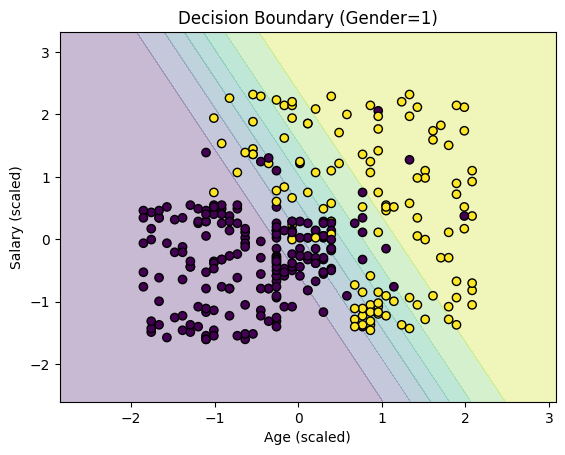

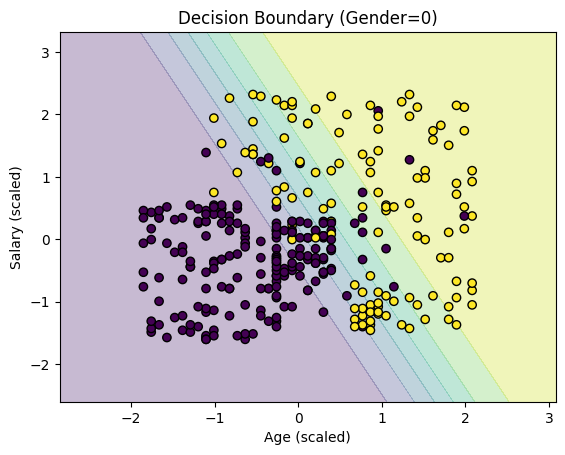

In [26]:
plot_decision_boundary_3d(X_train, y_train, model, gender_value=1)  # Male
plot_decision_boundary_3d(X_train, y_train, model, gender_value=0)  # Female